## System impel

In [50]:
def initial_trend_old(series, slen):
    _sum = 0.0
    for i in range(slen):
        _sum += float(series[i+slen] - series[i]) / slen
    return _sum / slen

def initial_seasonal_components_old(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

def triple_exponential_smoothing_old(series,n_preds, slen, alpha, beta, gamma):
    result = []
    seasonals = initial_seasonal_components_old(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend_old(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

## Forecasting the start of the day with complete two weeks

In [51]:
working_hours = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26]

day_value = working_hours+[0]*4*12
workdays = day_value * 5
week = workdays + [0]*4*48
two_weeks = week*2

to_forecast= 12*4
seasonlity = 7*4*24


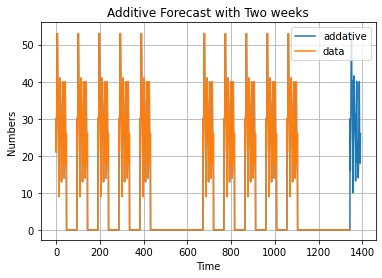

In [52]:
import matplotlib.pyplot as plt

# plotting the Series
two_weeks_addative_result = triple_exponential_smoothing_old(two_weeks,to_forecast,seasonlity, 0.5, 0.1, 1.0)

plt.plot(range(len(two_weeks)+to_forecast),two_weeks+two_weeks_addative_result[-to_forecast:], label = "addative")
plt.plot(range(len(two_weeks)),two_weeks, label = "data")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Additive Forecast with Two weeks')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Numbers')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

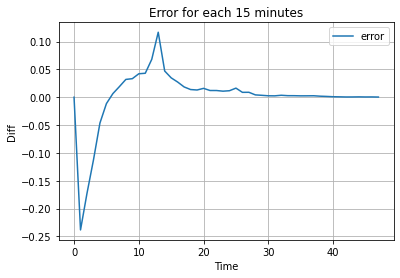

In [74]:
import matplotlib.pyplot as plt
import numpy as np

error  = (np.array(two_weeks_addative_result[-to_forecast:]) - np.array(working_hours[:to_forecast])) / np.array(working_hours[:to_forecast])
# plotting the Series
plt.plot(error, label = "error")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Error for each 15 minutes')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

# Assume couple of hours has pass

In [54]:
hours = 4
working_hours_to_add = 4*hours
two_weeks_with_some_hours = two_weeks + day_value[:working_hours_to_add]

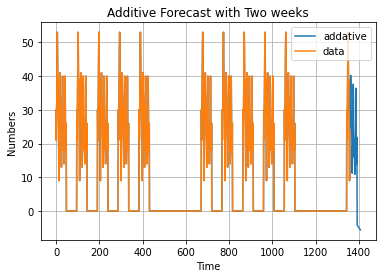

In [55]:
import matplotlib.pyplot as plt

# plotting the Series
two_weeks_with_some_hours_addative_result = triple_exponential_smoothing_old(two_weeks_with_some_hours,to_forecast,seasonlity, 0.5, 0.1, 1.0)

plt.plot(range(len(two_weeks_with_some_hours)+to_forecast),two_weeks_with_some_hours + two_weeks_with_some_hours_addative_result[-to_forecast:], label = "addative")
plt.plot(range(len(two_weeks_with_some_hours)),two_weeks_with_some_hours, label = "data")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Additive Forecast with Two weeks')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Numbers')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

<ipython-input-70-da6c8a88191b>:4: RuntimeWarning: divide by zero encountered in true_divide
  error  = ((np.array(two_weeks_with_some_hours_addative_result[-to_forecast:]) - np.array(day_value[working_hours_to_add:working_hours_to_add+to_forecast]))/np.array(day_value[working_hours_to_add:working_hours_to_add+to_forecast]))


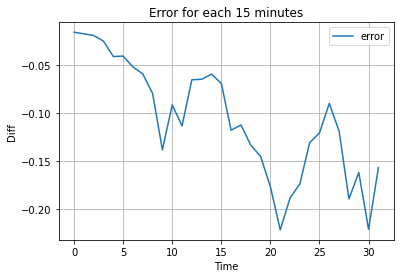

In [70]:
import matplotlib.pyplot as plt
import numpy as np

error  = ((np.array(two_weeks_with_some_hours_addative_result[-to_forecast:]) - np.array(day_value[working_hours_to_add:working_hours_to_add+to_forecast]))/np.array(day_value[working_hours_to_add:working_hours_to_add+to_forecast]))
# plotting the Series
plt.plot(error, label = "error")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Error for each 15 minutes')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [71]:
mean_errors = list()
median_errors = list()
steps = list(range(24*4))
for step in steps:
    two_weeks_with_var_hours = two_weeks + day_value[:step]
    two_weeks_with_var_hours_addative_result = triple_exponential_smoothing_old(two_weeks_with_var_hours,to_forecast,seasonlity, 0.5, 0.1, 1.0)
    prec_error  = (np.array(two_weeks_with_var_hours_addative_result[-to_forecast:]) - np.array(two_weeks[step:step+to_forecast]))/np.array(two_weeks[step:step+to_forecast])
    
    mean_errors.append(prec_error.mean())
    median_errors.append(np.median(prec_error))

<ipython-input-71-893dec60bed7>:7: RuntimeWarning: divide by zero encountered in true_divide
  prec_error  = (np.array(two_weeks_with_var_hours_addative_result[-to_forecast:]) - np.array(two_weeks[step:step+to_forecast]))/np.array(two_weeks[step:step+to_forecast])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


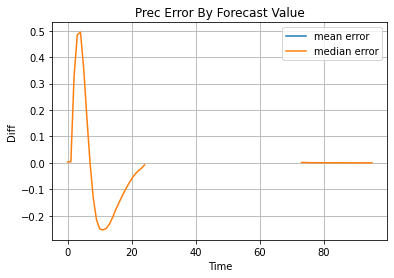

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# plotting the Series
plt.plot(steps,mean_errors, label = "mean error")
plt.plot(steps,median_errors, label = "median error")

#plt.plot(smoothen, label = "my selection")
# giving a title to the graph
plt.title('Prec Error By Forecast Value')
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Diff')

plt.grid(True)
# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()